In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [2]:
# Load the data from the Excel file
file_path = 'HBITCNER.xlsx'
data = pd.read_excel('/Users/chancelee/Downloads/HBITCNER.xlsx')

# Calculate log returns
data['log_return'] = np.log(data['PX_LAST']) - np.log(data['PX_LAST'].shift(1))

# Drop the NaN values that are a result of the log return calculation
data.dropna(inplace=True)

# Partition the data into 80% for training and 20% for testing
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]


## The log Returns over time for training data : No significant trend

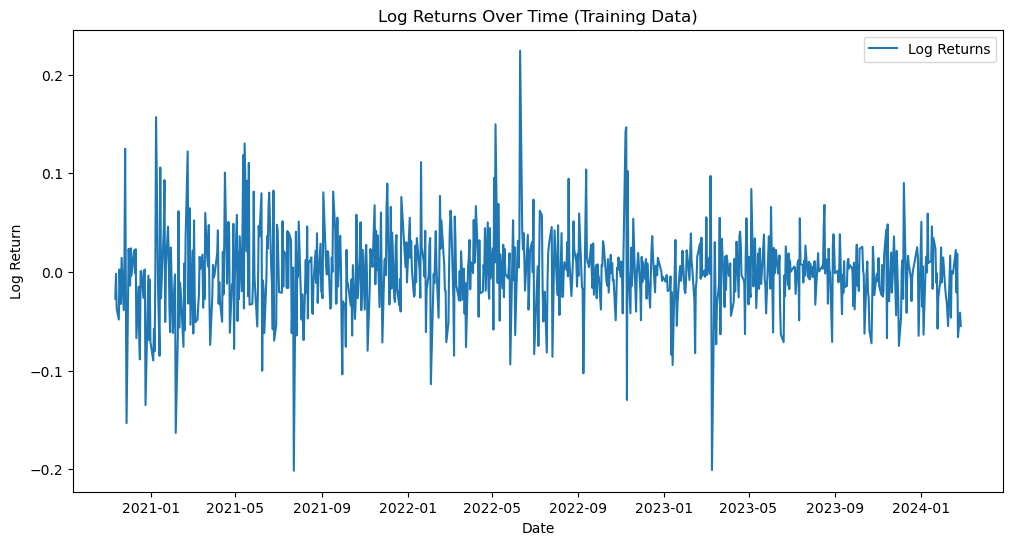

In [3]:
# Perform EDA on the training data
# Plotting the log returns of the training data
plt.figure(figsize=(12, 6))
plt.plot(train_data['Date'], train_data['log_return'], label='Log Returns')
plt.title('Log Returns Over Time (Training Data)')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.show()


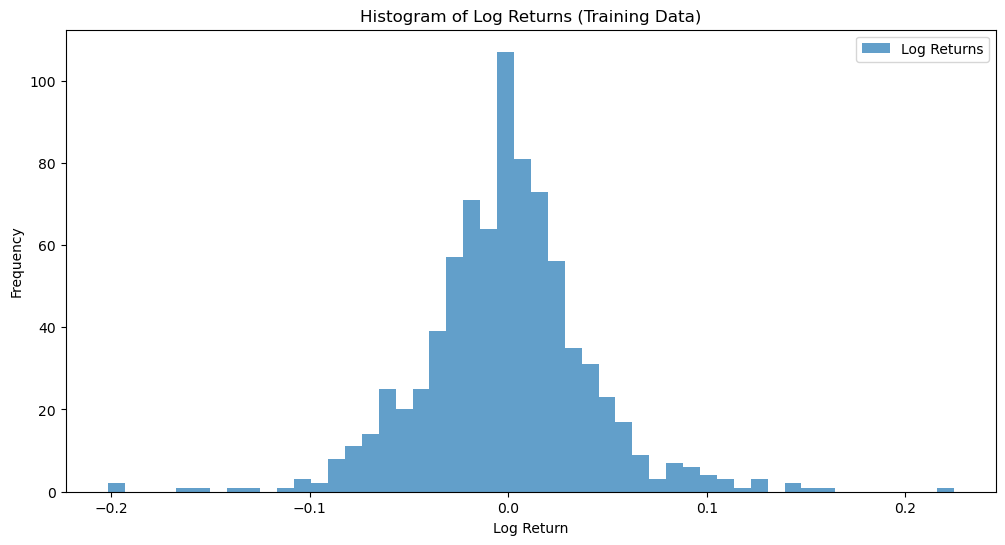

In [4]:
# Plotting the histogram of the log returns
plt.figure(figsize=(12, 6))
plt.hist(train_data['log_return'], bins=50, alpha=0.7, label='Log Returns')
plt.title('Histogram of Log Returns (Training Data)')
plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.legend()
plt.show()


## ACF and PACF Plot

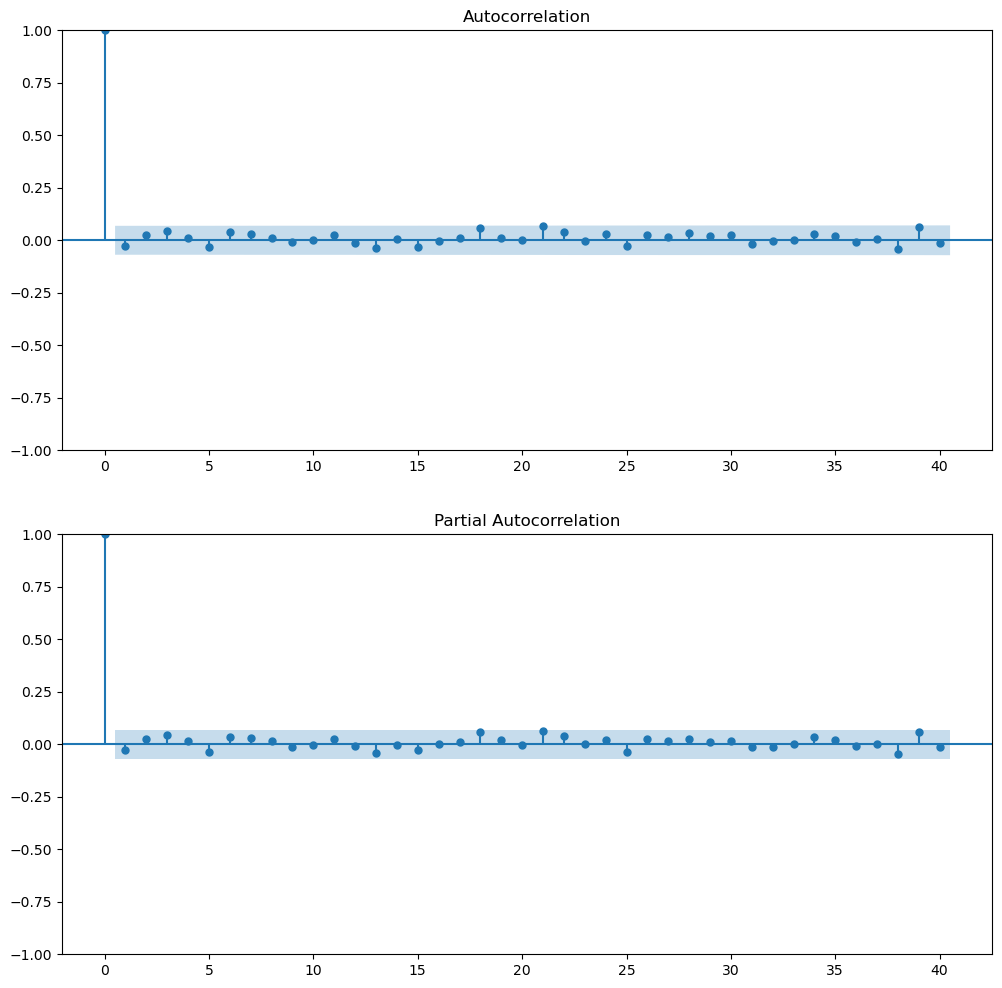

In [5]:
# Plotting ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
plot_acf(train_data['log_return'], lags=40, ax=ax1)
plot_pacf(train_data['log_return'], lags=40, ax=ax2)
plt.show()


In [6]:
# Perform Augmented Dickey-Fuller test to check for white noise
adf_test = adfuller(train_data['log_return'], autolag='AIC')

# Print ADF test results
adf_results = {
    'ADF Statistic': adf_test[0],
    'p-value': adf_test[1],
    'Number of lags used': adf_test[2],
    'Number of observations': adf_test[3],
    'Critical Values': adf_test[4],
}

adf_results


{'ADF Statistic': -29.17766536345719,
 'p-value': 0.0,
 'Number of lags used': 0,
 'Number of observations': 809,
 'Critical Values': {'1%': -3.4384589869479023,
  '5%': -2.8651192271940693,
  '10%': -2.5686758988725416}}

In [9]:
# Perform Ljung-Box test
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test on the training data's log returns
# Testing for absence of autocorrelation at multiple lags
lb_test_results = acorr_ljungbox(train_data['log_return'], lags=[10, 20, 30, 40], return_df=True)

# Display the Ljung-Box test results
print(lb_test_results)


      lb_stat  lb_pvalue
10   5.927151   0.821346
20  11.459896   0.933413
30  20.399626   0.905719
40  26.699893   0.947039


## ADF (Augmented Dickey-Fuller) test:
The results give us a comprehensive analysis on the stationarity of data. 

### ADF Statistic: -29.17766536345719: 
The test statistic is significantly negative. This value is far below the critical values, indicating strong evidence against the null hypothesis. Therefore, the data is meaningful for studying.

### p-value: 0.0: 
The p-value tells us the probability of obtaining a test statistic at least as extreme as the one observed, under the assumption that the null hypothesis is true. This p-value of 0.0 suggests that the null hypothesis  can be rejected with high confidence.

Stationarity is a desirable property when modeling time series because many predictive models assume or require the series they are modeling to be stationary. Based on these results, the log returns of our data are stationary, which suggests that it is well-suited for further time series analysis and modeling, without the need for differencing or transformations to achieve stationarity. 


## Ljung-Box test:
The Ljung-Box test results for the training data's log returns at various lags (10, 20, 30, and 40) are as follows:

At lag 10: The test statistic is approximately 5.927 with a p-value of 0.821.
At lag 20: The test statistic increases to approximately 11.460 with a p-value of 0.933.
At lag 30: The test statistic is approximately 20.400 with a p-value of 0.906.
At lag 40: The test statistic is approximately 26.700 with a p-value of 0.947.

### Interpretation:
These results suggest that, across a range of lags, there is no significant evidence of autocorrelation in the log returns of the training data. The high p-values at all tested lags (well above the common significance threshold of  0.05) indicate that we fail to reject the null hypothesis of the Ljung-Box test, which states there is no autocorrelation at these lags.

### Conclusion on White Noise Test:
Given the absence of significant autocorrelation, the log returns of your data exhibit one of the key characteristics of white noise for the tested lags. Combined with the previous Augmented Dickey-Fuller test results showing stationarity, these findings suggest that the series behaves in a manner consistent with white noise, under the specific criteria of having no autocorrelation and being stationary.

In [10]:
pip install pandas statsmodels scipy

Note: you may need to restart the kernel to use updated packages.


In [12]:
from statsmodels.tsa.stattools import adfuller, kpss
from scipy.stats import jarque_bera


In [16]:
print(train_data)

          Date   PX_LAST  log_return
1   2024-02-27  20833.16   -0.054871
2   2024-02-26  19990.72   -0.041278
3   2024-02-23  18710.79   -0.066168
4   2024-02-22  19059.70    0.018476
5   2024-02-21  18666.39   -0.020852
..         ...       ...         ...
806 2020-11-17   7768.33    0.002540
807 2020-11-16   7402.48   -0.048240
808 2020-11-13   7128.64   -0.037695
809 2020-11-12   7115.50   -0.001845
810 2020-11-11   6924.90   -0.027152

[810 rows x 3 columns]


In [19]:
# JB test
jb_stat, jb_pvalue = jarque_bera(train_data['log_return'])
print("Jarque-Bera test")
print(f"JB Statistic: {jb_stat}, p-value: {jb_pvalue}")

Jarque-Bera test
JB Statistic: 338.1214682693034, p-value: 3.7831717568533575e-74


In [14]:
# Augmented Dickey-Fuller test for unit roots
adf_stat, adf_pvalue, _, _, adf_critical_values, _ = adfuller(log_returns_train, autolag='AIC')
print("\nAugmented Dickey-Fuller test")
print(f"ADF Statistic: {adf_stat}, p-value: {adf_pvalue}")
print(f"Critical Values: {adf_critical_values}")

# KPSS test for trend stationarity
kpss_stat, kpss_pvalue, _, kpss_critical_values = kpss(log_returns_train, regression='c')
print("\nKPSS test")
print(f"KPSS Statistic: {kpss_stat}, p-value: {kpss_pvalue}")
print(f"Critical Values: {kpss_critical_values}")


Augmented Dickey-Fuller test
ADF Statistic: -29.17766536345719, p-value: 0.0
Critical Values: {'1%': -3.4384589869479023, '5%': -2.8651192271940693, '10%': -2.5686758988725416}

KPSS test
KPSS Statistic: 0.23553601225343276, p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/var/folders/dl/ncr63l_92h7bkwdzh6xz_c880000gn/T/ipykernel_14379/3270688813.py:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_pvalue, _, kpss_critical_values = kpss(log_returns_train, regression='c')


### JB test:
Given the very small p-value in your Jarque-Bera test result, we can reject the null hypothesis with high confidence, implying that the log returns of your data do not follow a normal distribution. The distribution of the log returns has significant skewness or kurtosis.

### ADF test:
The test statistic is significantly negative. This value is far below the critical values, indicating strong evidence against the null hypothesis. Therefore, the data is meaningful for studying.

### KPSS test:
p-value: 0.1 
Since the p-value is greater than 0.05, you fail to reject the null hypothesis at the 10% significance level, suggesting that the series can be considered stationary around a deterministic trend. 

Critical Values: Given the KPSS statistic of 0.236, it is below the critical values for the 10%, 5%, 2.5%, and 1% levels, further indicating that the test does not provide sufficient evidence to reject the null hypothesis of stationarity at these levels.
